Data set from https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence/data

# **Setting up Environment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# **Loading the Dataset**

In [2]:
file_path = 'Thyroid_Diff.csv'
thyroid_data = pd.read_csv(file_path)

print(f'Dataset shape: {thyroid_data.shape}')
thyroid_data.head()

Dataset shape: (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# **Understanding the Dataset**

In [13]:
print("Column names:")
print(thyroid_data.columns.tolist())

print("Data types:")
thyroid_data.dtypes

Column names:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
Data types:


,0
Age,int64
Gender,object
Smoking,object
Hx Smoking,object
Hx Radiothreapy,object
Thyroid Function,object
Physical Examination,object
Adenopathy,object
Pathology,object
Focality,object


In [52]:
thyroid_data.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning & Preprocessing**

In [16]:
print("Missing values per column:")
thyroid_data.isnull().sum()

Missing values per column:


,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [26]:
print("\nCorrecting misspelled column name: 'Hx Radiothreapy' to 'Hx Radiotherapy'\n")
thyroid_data.rename(columns={'Hx Radiothreapy': 'Hx Radiotherapy'}, inplace=True)
print("Corrected column names:")
print(thyroid_data.columns.tolist())


Correcting misspelled column name: 'Hx Radiothreapy' to 'Hx Radiotherapy'

Corrected column names:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [17]:
# Check unique values for categorical columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Unique values in {column}:{thyroid_data[column].value_counts()}")

Unique values in Gender:Gender
F    312
M     71
Name: count, dtype: int64
Unique values in Smoking:Smoking
No     334
Yes     49
Name: count, dtype: int64
Unique values in Hx Smoking:Hx Smoking
No     355
Yes     28
Name: count, dtype: int64
Unique values in Hx Radiothreapy:Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64
Unique values in Thyroid Function:Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64
Unique values in Physical Examination:Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64
Unique values in Adenopathy:Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: c

From this, we can see that there is a significant difference in terms of gender. There are 312 females compared to only 71 males. This aligns well with common knowledge that thyroid cancer is more common in females.

We also that there is a low amount of smokers and a low amount of people with a history of smoking. This means that most people in this dataset to be non-smokers.

In terms of people with a history of prior radiotherapy, there are only 7 people within the entire dataset meaning that it is a very rare risk factor in our dataset.

Most of the patients in this dataset are euthyroid, meaning normal thyroid function. The most common kind of dysfunction is Clinical Hyperthyroidism.

Both Multinodular goiter and Single nodular goiter-right are the most common in these patients followed by Single nodular goiter-left. Only very few, 7 patients, had a normal examination findings.

Most of the patients had no adenopathy, or lymph node involvement. When there was involvement, right-side adenopathy was the most common.

Papillary thyroid cancer is the most common type in this dataset followed by micropapillary. This seems to reflects the general distribution of thyroid cancer types in the population.

Most tumors are unifocal (247 patients) rather than multifocal (136 patients).

TNM-Stages show that T2 classification tumors, no lymph node invovement, and metastases level M0 were the most common in these patients. The monst common characteristics are thus: The tumor is within the thyroid between 2cm-4cm, cancer hasn't spread to to nearby lymph nodes, and cancer hasn't spread to other parts of the body.

The most common overall stage is Stage I indicating that most are early stage disease.

Most patients are classified as low risk (249) with fewer intermediate (102) and high risk (32) cases.

208 patients had an excellent response, while 91 had structural incomplete response.

108 patients experienced recurrence, while 275 did not. This finding is incredibly significant and important to this research.

---
Overall, the data looks clean with no inconsistencies in terms of missing data. The only error I noticed was a mispelling of the column name for the history of radiotherapy which was a quick renaming fix. As for the data itself, I will have to keep in mind the massive difference in factors like gender as well as radiotherapy when I am interpreting results.

Additional Help: https://www.cancerresearchuk.org/about-cancer/thyroid-cancer/stages-types/tnm-staging#:~:text=Metastases%20(M),as%20the%20lungs%20or%20bones.


# **Exploring the Dataset**

Age Distibution

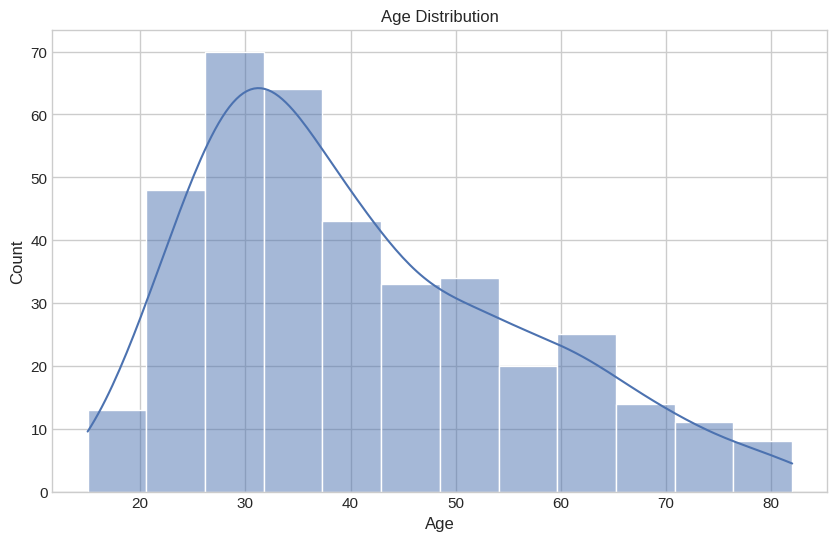

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(thyroid_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Gender Distribution

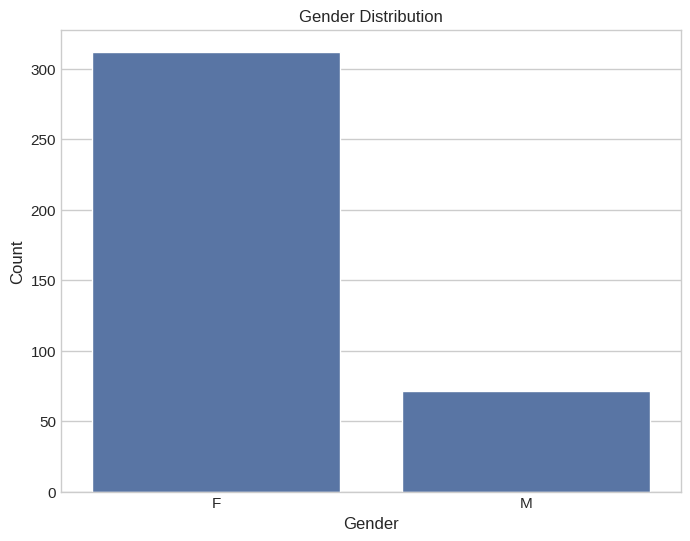

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=thyroid_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Pathology Distribution

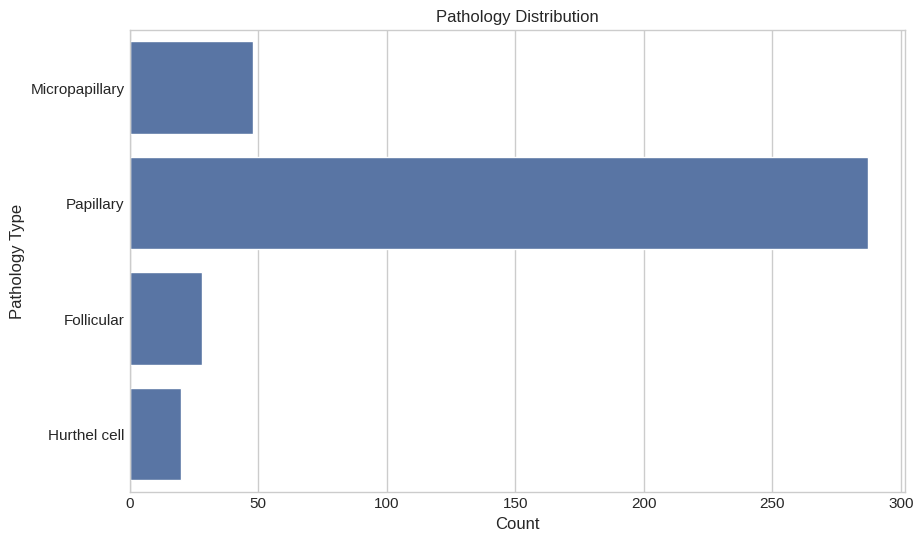

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Pathology', data=thyroid_data)
plt.title('Pathology Distribution')
plt.xlabel('Count')
plt.ylabel('Pathology Type')
plt.show()

Risk Distribution

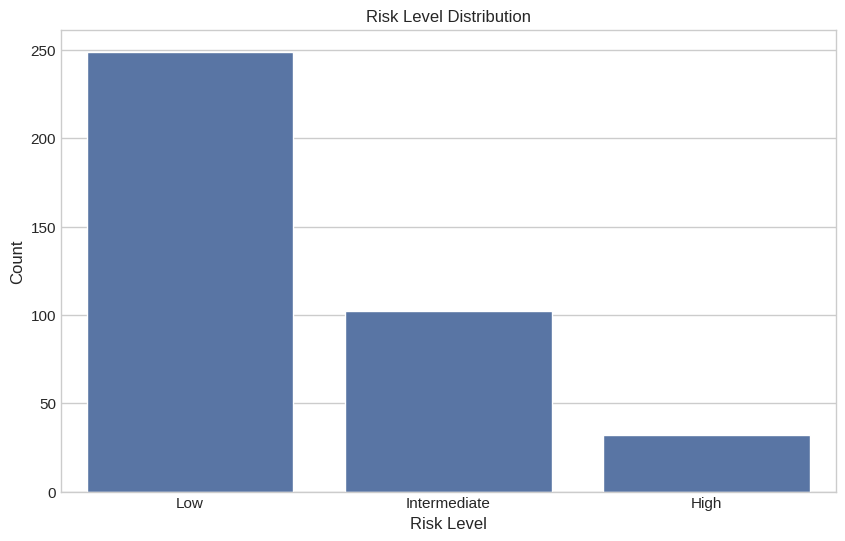

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', data=thyroid_data)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

Recurrence Distribution

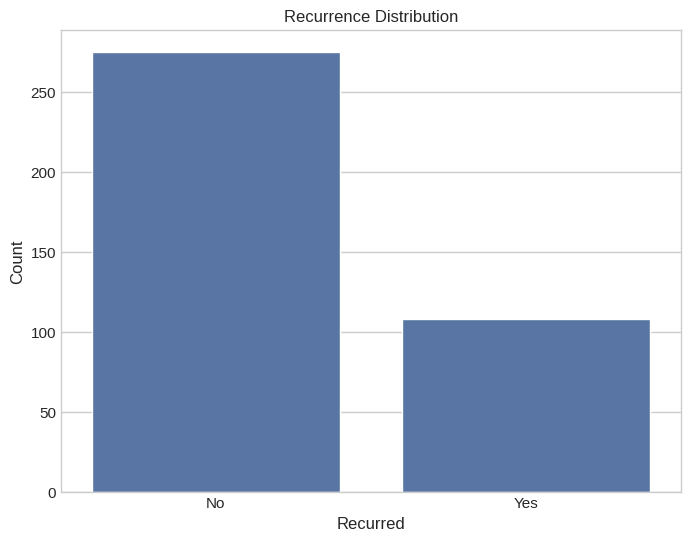

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', data=thyroid_data)
plt.title('Recurrence Distribution')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

Smoking Distribution

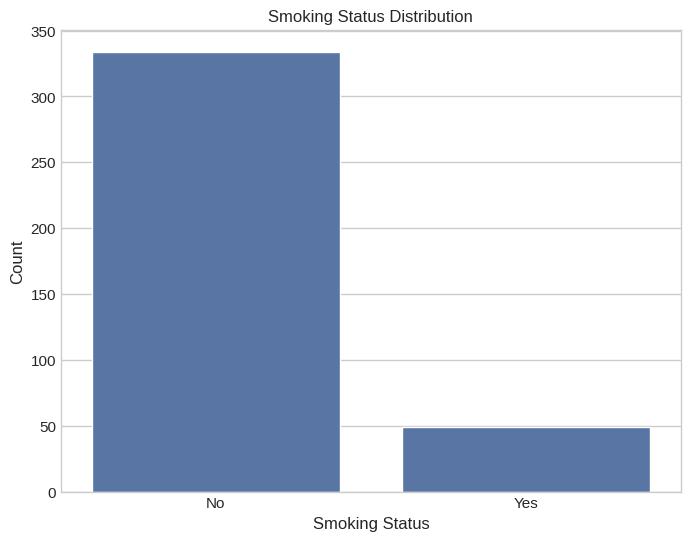

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=thyroid_data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

History of Smoking Distribution

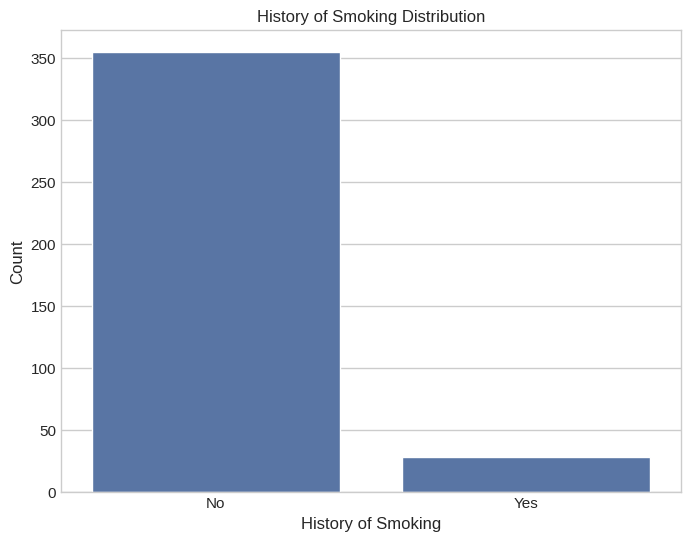

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Smoking', data=thyroid_data)
plt.title('History of Smoking Distribution')
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.show()

History of Radiotherapy

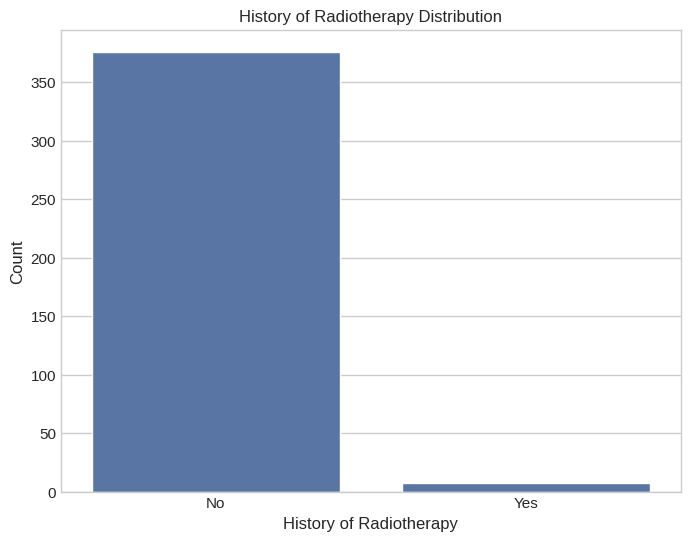

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Radiotherapy', data=thyroid_data)
plt.title('History of Radiotherapy Distribution')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Count')
plt.show()

Thyroid Function Distribution

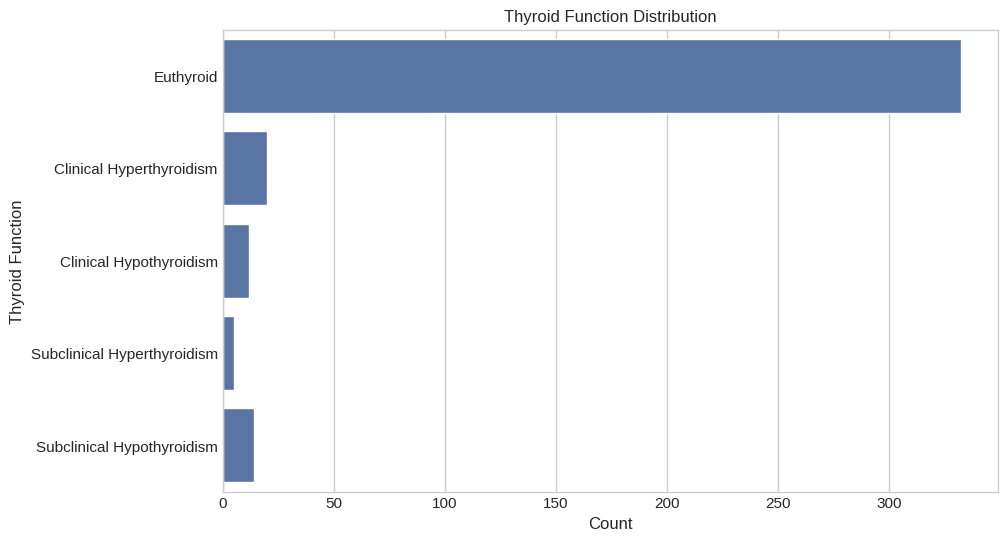

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Thyroid Function', data=thyroid_data)
plt.title('Thyroid Function Distribution')
plt.xlabel('Count')
plt.ylabel('Thyroid Function')
plt.show()

Physical Examination Distribution

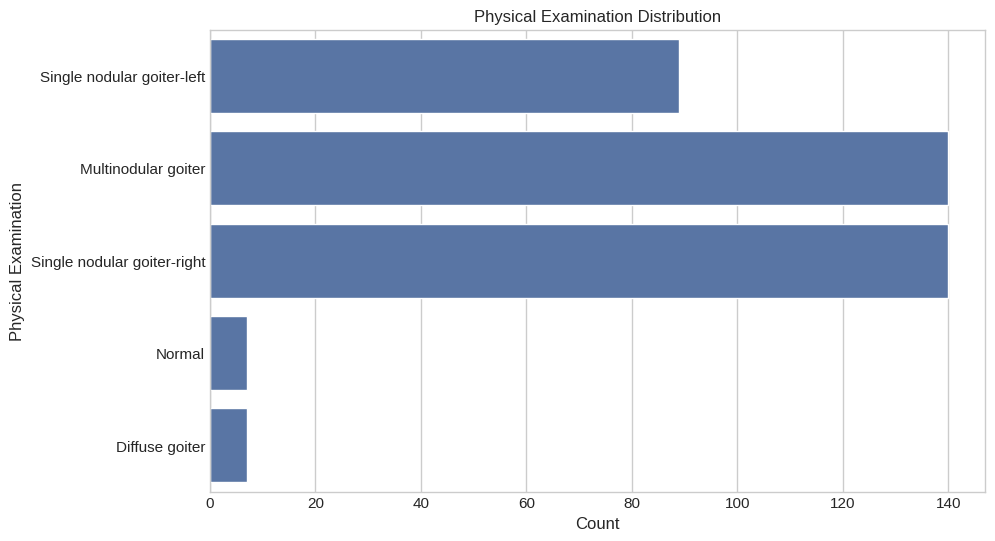

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Physical Examination', data=thyroid_data)
plt.title('Physical Examination Distribution')
plt.xlabel('Count')
plt.ylabel('Physical Examination')
plt.show()

Adenopathy Distribution

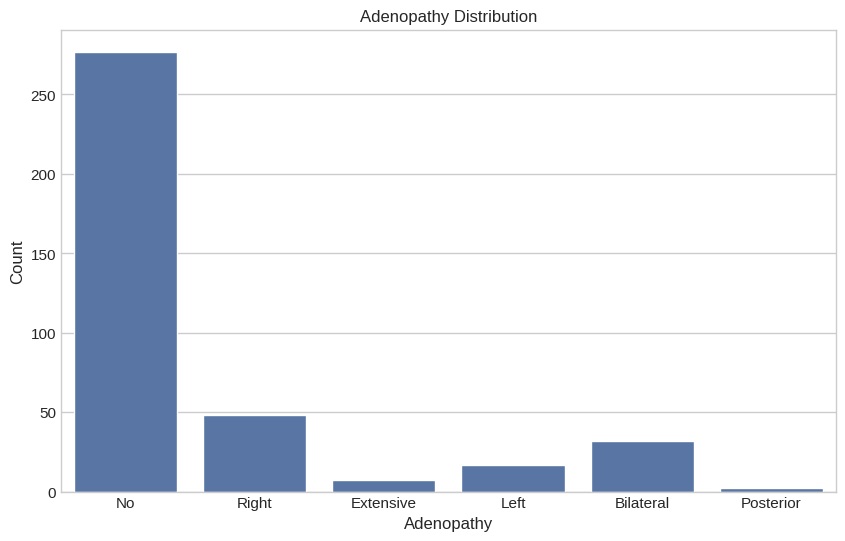

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Adenopathy', data=thyroid_data)
plt.title('Adenopathy Distribution')
plt.xlabel('Adenopathy')
plt.ylabel('Count')
plt.show()

Focality Distribution

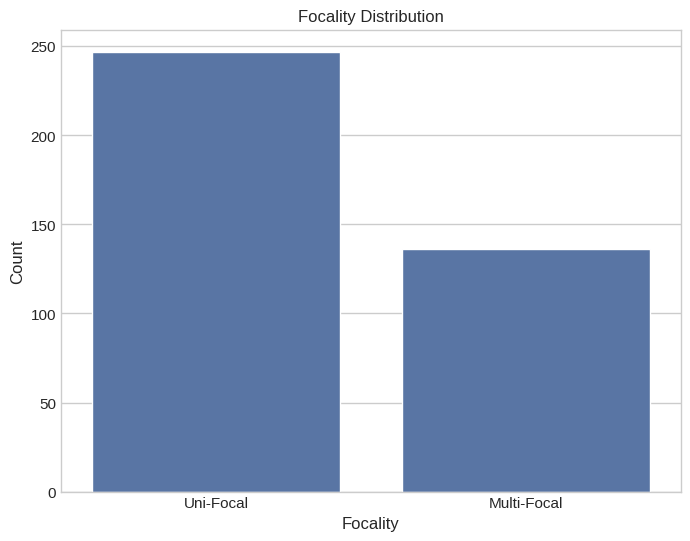

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Focality', data=thyroid_data)
plt.title('Focality Distribution')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.show()

Primary Tumor "T" Stage Distribution

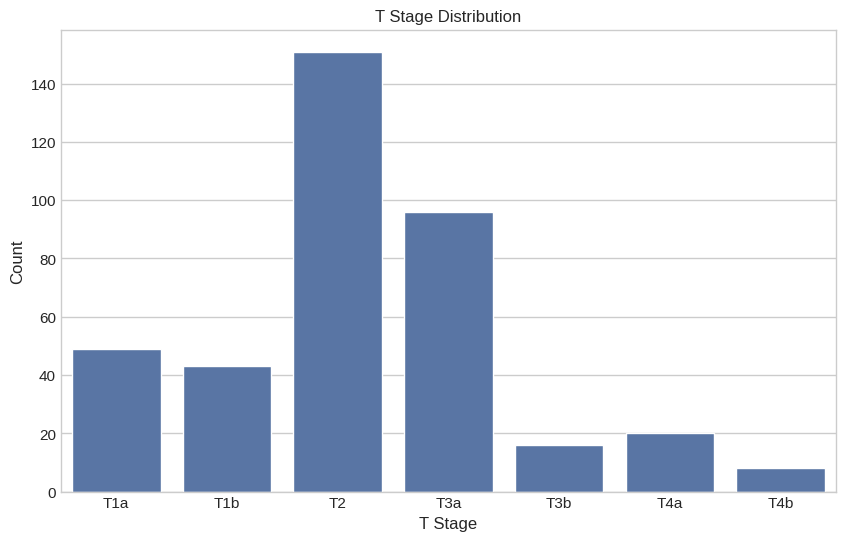

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='T', data=thyroid_data)
plt.title('T Stage Distribution')
plt.xlabel('T Stage')
plt.ylabel('Count')
plt.show()

Regional Nymph Node "N" Stage Distribution

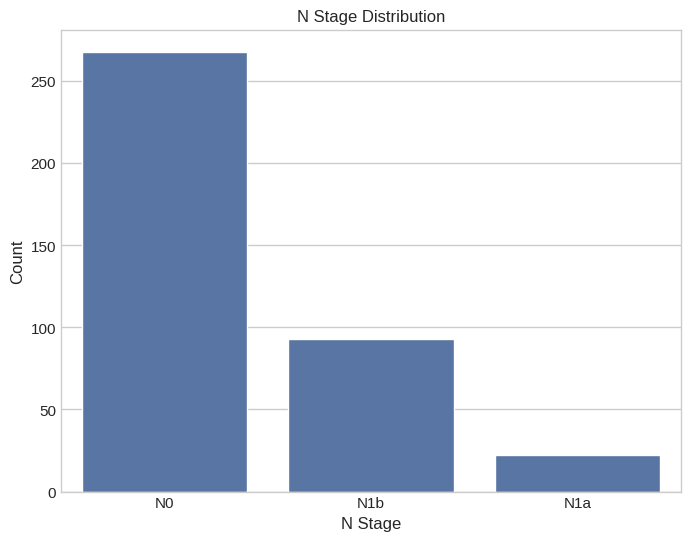

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='N', data=thyroid_data)
plt.title('N Stage Distribution')
plt.xlabel('N Stage')
plt.ylabel('Count')
plt.show()

Distant Metastasis "M" Stage Distribution

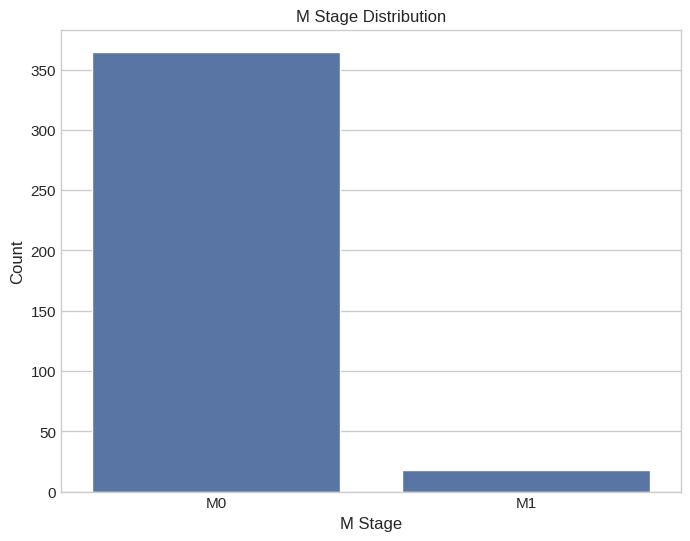

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='M', data=thyroid_data)
plt.title('M Stage Distribution')
plt.xlabel('M Stage')
plt.ylabel('Count')
plt.show()

Cancer Stage Distribution

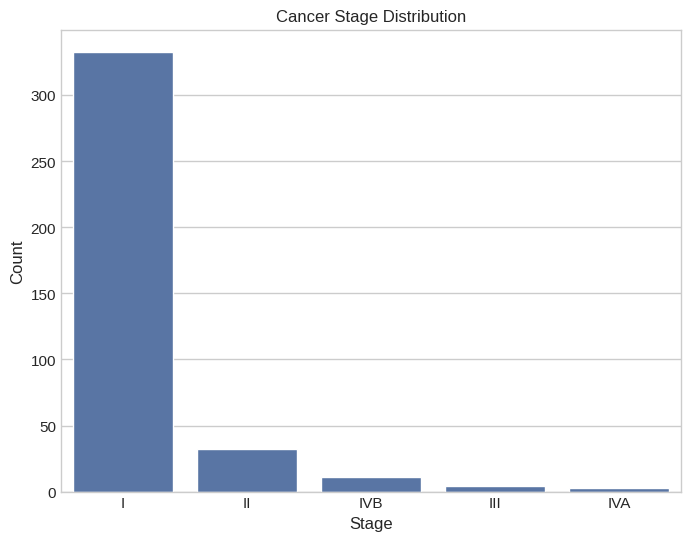

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=thyroid_data)
plt.title('Cancer Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

Response Distribution

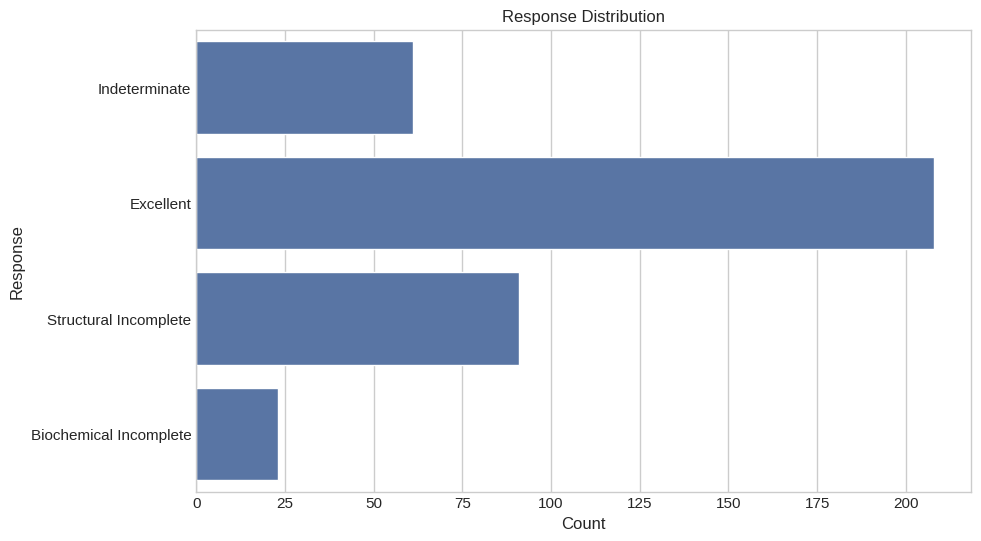

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Response', data=thyroid_data)
plt.title('Response Distribution')
plt.xlabel('Count')
plt.ylabel('Response')
plt.show()

# **Analysis of Relationship with Recurrence**

Age - Recurrence

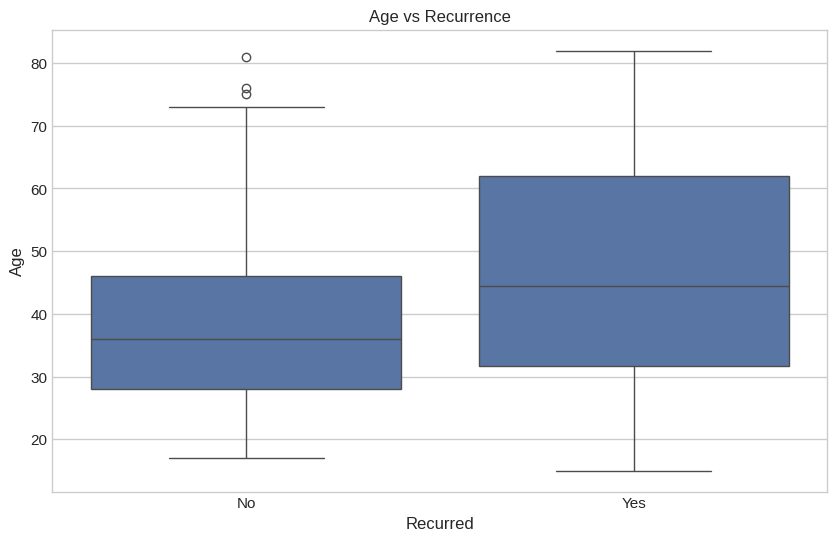

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recurred', y='Age', data=thyroid_data)
plt.title('Age vs Recurrence')
plt.xlabel('Recurred')
plt.ylabel('Age')
plt.show()

Gender - Recurrence

<Figure size 1000x600 with 0 Axes>

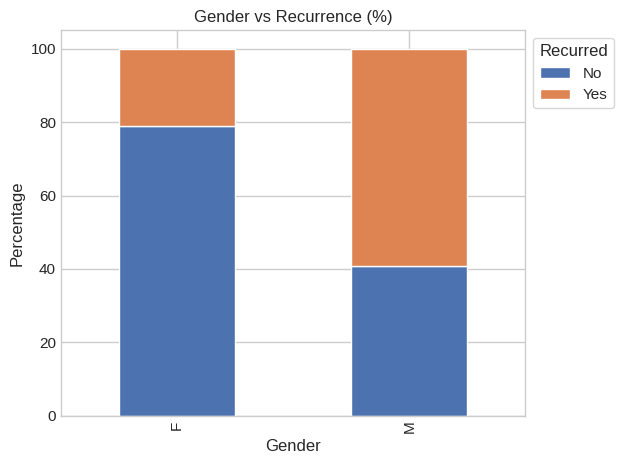

In [34]:
plt.figure(figsize=(10, 6))
recurrence_by_gender = pd.crosstab(thyroid_data['Gender'], thyroid_data['Recurred'])
recurrence_by_gender_pct = recurrence_by_gender.div(recurrence_by_gender.sum(axis=1), axis=0) * 100

recurrence_by_gender_pct.plot(kind='bar', stacked=True)
plt.title('Gender vs Recurrence (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Smoking - Recurrence

<Figure size 1000x600 with 0 Axes>

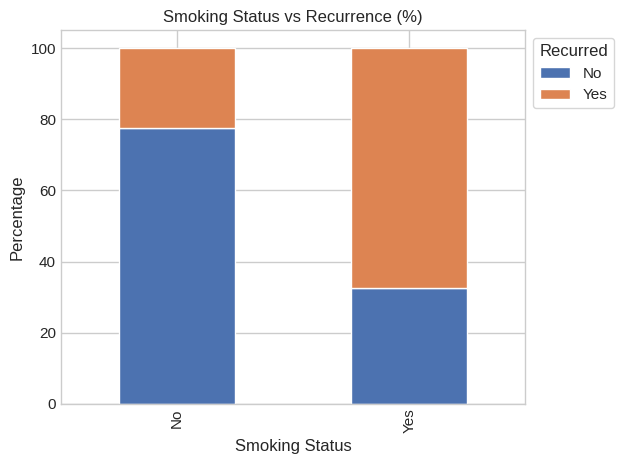

In [51]:
plt.figure(figsize=(10, 6))
recurrence_by_smoking = pd.crosstab(thyroid_data['Smoking'], thyroid_data['Recurred'])
recurrence_by_smoking_pct = recurrence_by_smoking.div(recurrence_by_smoking.sum(axis=1), axis=0) * 100

recurrence_by_smoking_pct.plot(kind='bar', stacked=True)
plt.title('Smoking Status vs Recurrence (%)')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

History of Smoking - Recurrence

<Figure size 1000x600 with 0 Axes>

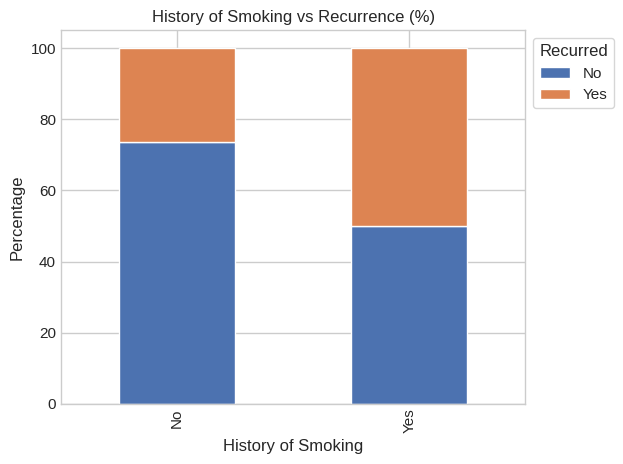

In [39]:
plt.figure(figsize=(10, 6))
recurrence_by_hx_smoking = pd.crosstab(thyroid_data['Hx Smoking'], thyroid_data['Recurred'])
recurrence_by_hx_smoking_pct = recurrence_by_hx_smoking.div(recurrence_by_hx_smoking.sum(axis=1), axis=0) * 100

recurrence_by_hx_smoking_pct.plot(kind='bar', stacked=True)
plt.title('History of Smoking vs Recurrence (%)')
plt.xlabel('History of Smoking')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

History of Radiotherapy - Recurrence

<Figure size 1000x600 with 0 Axes>

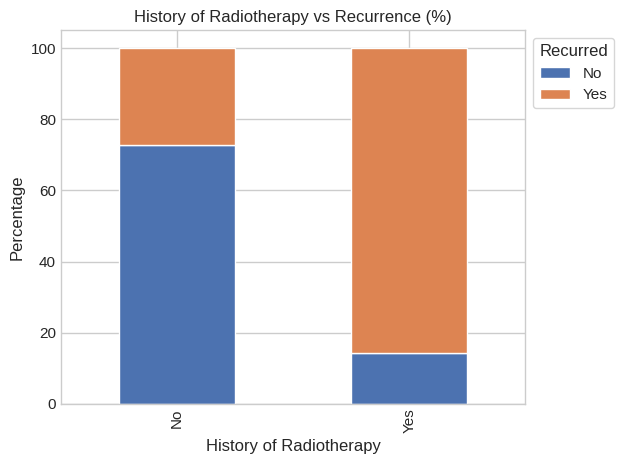

In [40]:
plt.figure(figsize=(10, 6))
recurrence_by_hx_radiotherapy = pd.crosstab(thyroid_data['Hx Radiotherapy'], thyroid_data['Recurred'])
recurrence_by_hx_radiotherapy_pct = recurrence_by_hx_radiotherapy.div(recurrence_by_hx_radiotherapy.sum(axis=1), axis=0) * 100

recurrence_by_hx_radiotherapy_pct.plot(kind='bar', stacked=True)
plt.title('History of Radiotherapy vs Recurrence (%)')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Thyroid Function - Recurrence

<Figure size 1200x600 with 0 Axes>

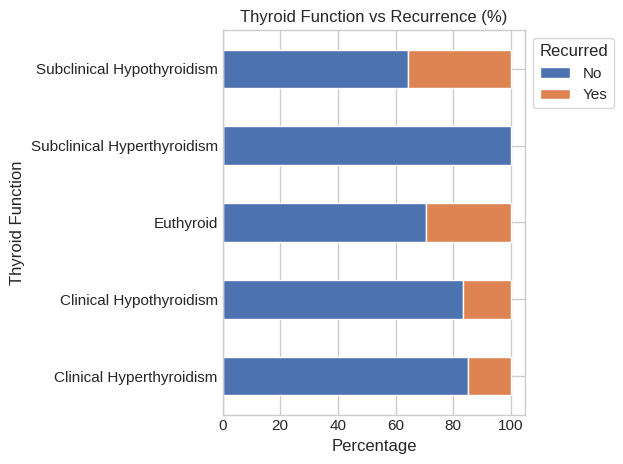

In [50]:
plt.figure(figsize=(12, 6))
recurrence_by_thyroid_function = pd.crosstab(thyroid_data['Thyroid Function'], thyroid_data['Recurred'])
recurrence_by_thyroid_function_pct = recurrence_by_thyroid_function.div(recurrence_by_thyroid_function.sum(axis=1), axis=0) * 100

recurrence_by_thyroid_function_pct.plot(kind='barh', stacked=True)
plt.title('Thyroid Function vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Thyroid Function')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Physical Examination - Recurrence

<Figure size 1200x600 with 0 Axes>

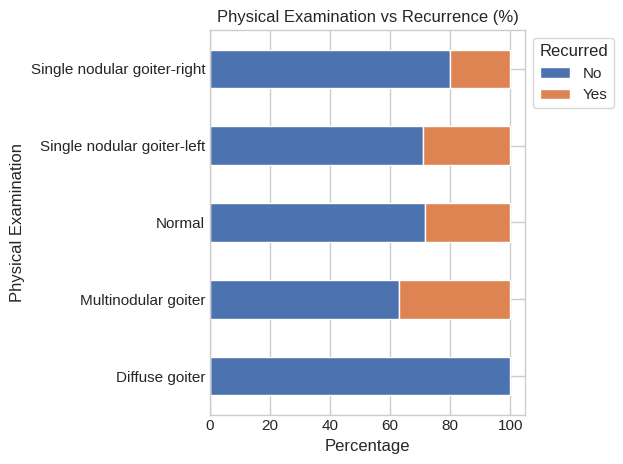

In [49]:
plt.figure(figsize=(12, 6))
recurrence_by_physical_exam = pd.crosstab(thyroid_data['Physical Examination'], thyroid_data['Recurred'])
recurrence_by_physical_exam_pct = recurrence_by_physical_exam.div(recurrence_by_physical_exam.sum(axis=1), axis=0) * 100

recurrence_by_physical_exam_pct.plot(kind='barh', stacked=True)
plt.title('Physical Examination vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Physical Examination')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Adenopathy - Recurrence

<Figure size 1000x600 with 0 Axes>

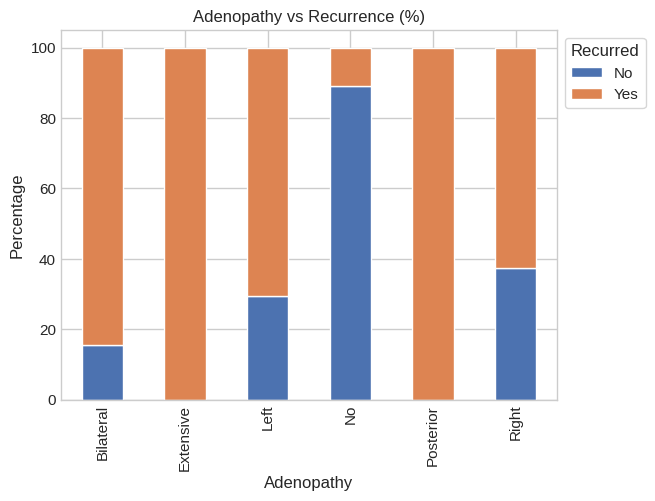

In [32]:
plt.figure(figsize=(10, 6))
recurrence_by_adenopathy = pd.crosstab(thyroid_data['Adenopathy'], thyroid_data['Recurred'])
recurrence_by_adenopathy_pct = recurrence_by_adenopathy.div(recurrence_by_adenopathy.sum(axis=1), axis=0) * 100

recurrence_by_adenopathy_pct.plot(kind='bar', stacked=True)
plt.title('Adenopathy vs Recurrence (%)')
plt.xlabel('Adenopathy')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

Pathology - Recurrence

<Figure size 1200x600 with 0 Axes>

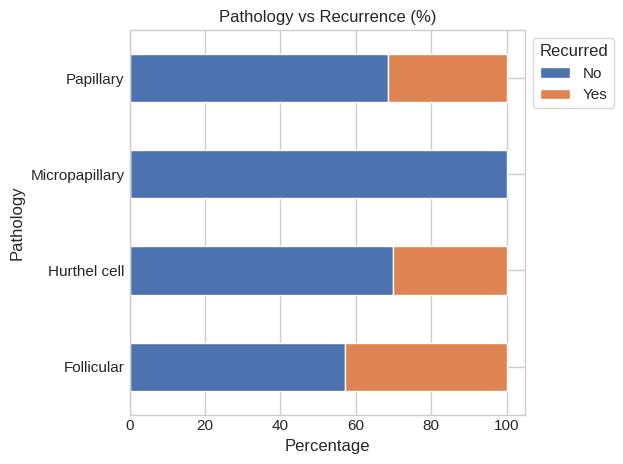

In [48]:
plt.figure(figsize=(12, 6))
recurrence_by_pathology = pd.crosstab(thyroid_data['Pathology'], thyroid_data['Recurred'])
recurrence_by_pathology_pct = recurrence_by_pathology.div(recurrence_by_pathology.sum(axis=1), axis=0) * 100

recurrence_by_pathology_pct.plot(kind='barh', stacked=True)
plt.title('Pathology vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Pathology')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Focality - Recurrence

<Figure size 1000x600 with 0 Axes>

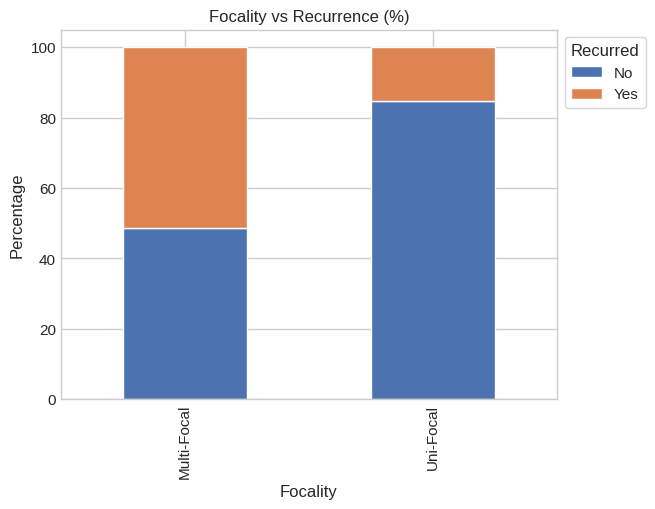

In [33]:
plt.figure(figsize=(10, 6))
recurrence_by_focality = pd.crosstab(thyroid_data['Focality'], thyroid_data['Recurred'])
recurrence_by_focality_pct = recurrence_by_focality.div(recurrence_by_focality.sum(axis=1), axis=0) * 100

recurrence_by_focality_pct.plot(kind='bar', stacked=True)
plt.title('Focality vs Recurrence (%)')
plt.xlabel('Focality')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

Risk Level - Recurrence

<Figure size 1200x600 with 0 Axes>

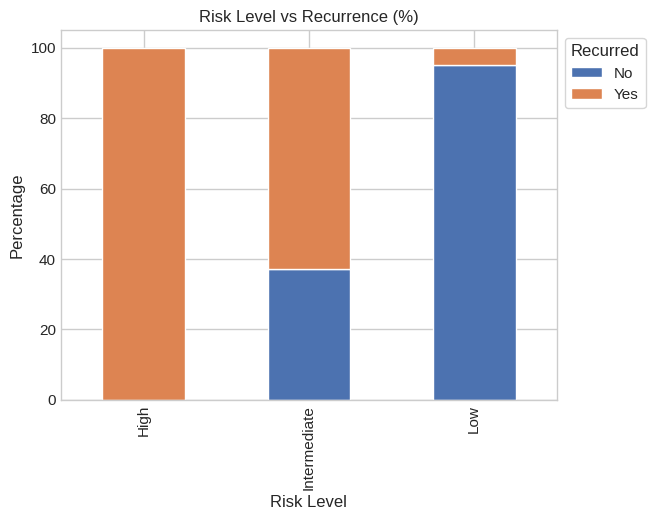

In [26]:
plt.figure(figsize=(12, 6))
recurrence_by_risk = pd.crosstab(thyroid_data['Risk'], thyroid_data['Recurred'])
recurrence_by_risk_pct = recurrence_by_risk.div(recurrence_by_risk.sum(axis=1), axis=0) * 100

recurrence_by_risk_pct.plot(kind='bar', stacked=True)
plt.title('Risk Level vs Recurrence (%)')
plt.xlabel('Risk Level')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

T Stage - Recurrence

<Figure size 1200x600 with 0 Axes>

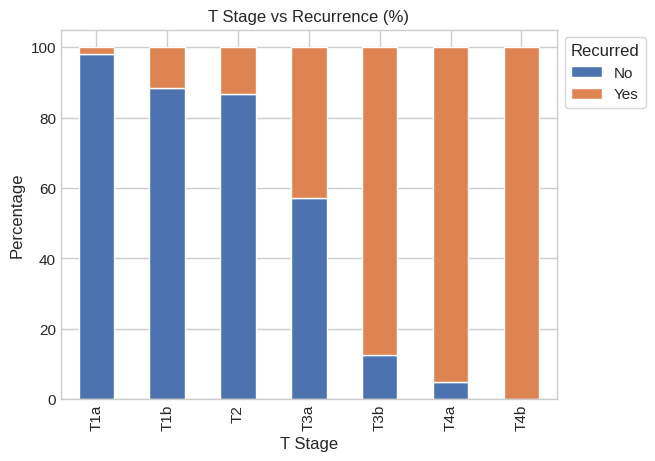

In [28]:
plt.figure(figsize=(12, 6))
recurrence_by_t = pd.crosstab(thyroid_data['T'], thyroid_data['Recurred'])
recurrence_by_t_pct = recurrence_by_t.div(recurrence_by_t.sum(axis=1), axis=0) * 100

recurrence_by_t_pct.plot(kind='bar', stacked=True)
plt.title('T Stage vs Recurrence (%)')
plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

N Stage - Recurrence

<Figure size 1000x600 with 0 Axes>

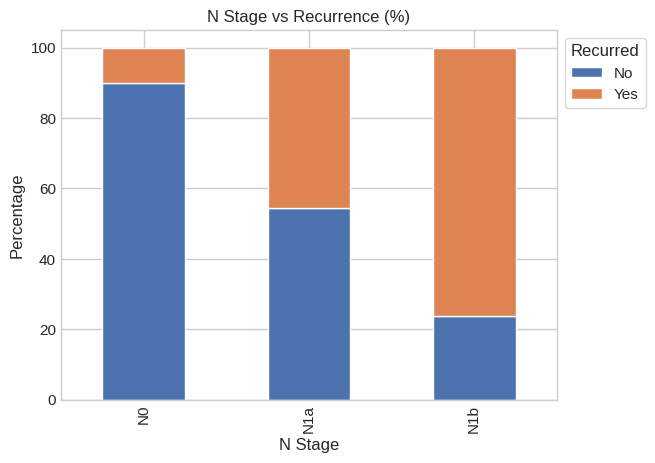

In [29]:
plt.figure(figsize=(10, 6))
recurrence_by_n = pd.crosstab(thyroid_data['N'], thyroid_data['Recurred'])
recurrence_by_n_pct = recurrence_by_n.div(recurrence_by_n.sum(axis=1), axis=0) * 100

recurrence_by_n_pct.plot(kind='bar', stacked=True)
plt.title('N Stage vs Recurrence (%)')
plt.xlabel('N Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

M-Stage - Recurrence

<Figure size 1000x600 with 0 Axes>

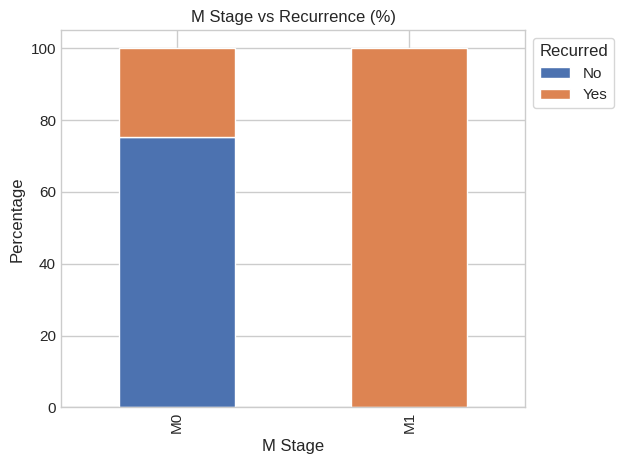

In [31]:
plt.figure(figsize=(10, 6))
recurrence_by_m = pd.crosstab(thyroid_data['M'], thyroid_data['Recurred'])
recurrence_by_m_pct = recurrence_by_m.div(recurrence_by_m.sum(axis=1), axis=0) * 100

recurrence_by_m_pct.plot(kind='bar', stacked=True)
plt.title('M Stage vs Recurrence (%)')
plt.xlabel('M Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Stage - Recurrence

<Figure size 1000x600 with 0 Axes>

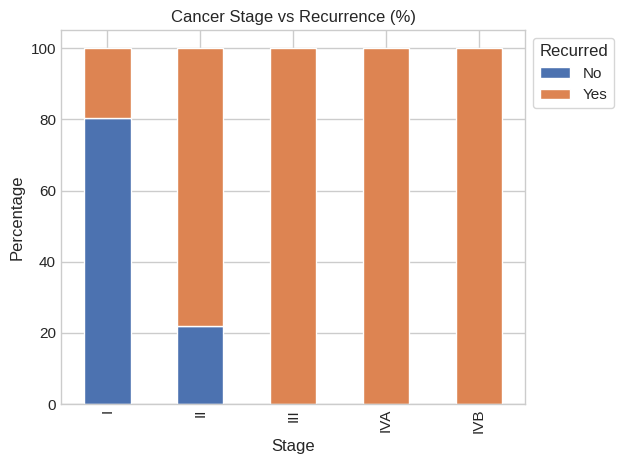

In [47]:
plt.figure(figsize=(10, 6))
recurrence_by_stage = pd.crosstab(thyroid_data['Stage'], thyroid_data['Recurred'])
recurrence_by_stage_pct = recurrence_by_stage.div(recurrence_by_stage.sum(axis=1), axis=0) * 100

recurrence_by_stage_pct.plot(kind='bar', stacked=True)
plt.title('Cancer Stage vs Recurrence (%)')
plt.xlabel('Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Response - Recurrence

<Figure size 1200x600 with 0 Axes>

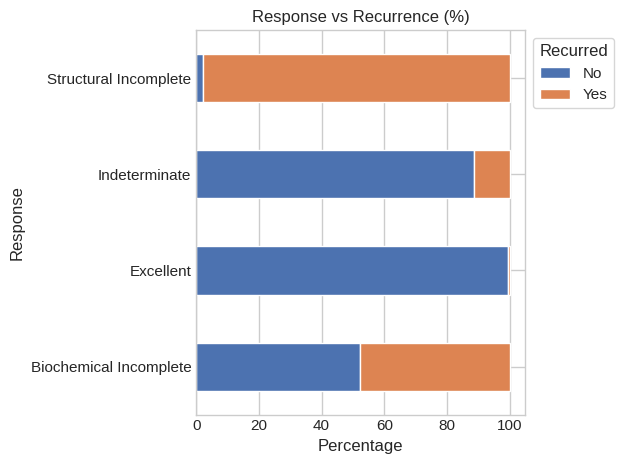

In [46]:
plt.figure(figsize=(12, 6))
recurrence_by_response = pd.crosstab(thyroid_data['Response'], thyroid_data['Recurred'])
recurrence_by_response_pct = recurrence_by_response.div(recurrence_by_response.sum(axis=1), axis=0) * 100

recurrence_by_response_pct.plot(kind='barh', stacked=True)
plt.title('Response vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Response')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Female patients seem to have a lower recurrence rate compared to males. While  majority of the females don't experience recurrence, the recurrence rate among males is notably higher. This suggests that males may be an independent risk factor for recurrence.

Patients that have a history of radiotherapy show a substantially higher recurrence rate. This is significant as it highlights the fact that a history of radiotherapy is a strong predictor of recurrence, possibly due to some treatment-resistant characteristics in these patients. We must keep in mind the proportion of patients that have a history of radiotherapy is quite low so we can't simply jump to conclusions yet.

Having a history of smoking can be seen to be associated with a higher recurrence rate. Patients who have a history of smoking are more likely to experience recurrence compared to those who don't. Current smokers also have a much higher recurrence rate compared to non-smokers. This supports the hypothesis that smoking may contribute to diseases or impair the ability to respond to treatment. It further emphasizes the negative impact of tobacco use on thyroid cancer outcomes. It is a risk factor worth addressing as it can be altered as a precautionary step with patient education and consultation.

Looking at the TNM-Staging, we can see the most dramatic change in the M stage (Metastasis) analysis as having been catagorized in M1, meaning the cancer has spread to another part of the body, almost universally indicates recurrence. This finding underscores just how important this factor is and calls for a need of strong surveillence of the cancer. As for the T stage (Tumor), something noteworthy is how in the earlier stages, there is a low recurrence rate, however, at the more advanced T stages, the recurrence rate gets progressively higher and higher. This indicates that the tumor size is yet another key factor to keep in mind when assessing the risk for recurrence.

Looking into the different pathological subtypes of thyroid cancer we see that Papillary and Hürthle Cell carcinomas have a moderate recurrence rates while micropapillary carcinoma shows nearly no recurrence. Follicular carcinoma, however, has the highest recurrence rate than than the rest. These findings suggest that the thyroid cancer subtype should be keeped in consideration when performing risk assessment.

As an summary of all the features, we can see that advanced T, N, and M stages, classification of high risk, and poor response to initial therapy are strongly associated with recurrence. Being a Male and a smoker (both current and in the past) are also linked to higher recurrence. Having certain kinds of pathological subtype, such as Follicular, is a strong indication of recurrence.